# This data is about properties sold in New York City over a 4 1/2 years period from January 2016 to June 2020.


# 1.Loading libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler    

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy import stats

In [4]:
#Reading Dataset
df = pd.read_csv('https://nychomesales.s3-us-west-1.amazonaws.com/CombinedData.csv')


In [5]:
#checking for any missing data
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
BLOCK                             False
LOT                               False
ADDRESS                           False
APARTMENT NUMBER                   True
ZIP CODE                           True
RESIDENTIAL UNITS                  True
COMMERCIAL UNITS                   True
TOTAL UNITS                        True
LAND SQUARE FEET                   True
GROSS SQUARE FEET                  True
YEAR BUILT                         True
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALEDATE                          False
dtype: bool

In [6]:
# At first I decided to use median for missing values then I changed my mind.
# df1 = df.fillna(lambda x: x.median().round(0))
# df = df.fillna(lambda x: round(x.median(), 0))

In [7]:
# dropping rows that has zero values in these columns (later I decided not to drop columns because it was reducing my data dramatically)
# df= df[df['SALE PRICE'] != 0]
# df= df[df['RESIDENTIAL UNITS'] != 0]
# df= df[df['COMMERCIAL UNITS'] != 0]
# df= df[df['TAX CLASS AT TIME OF SALE'] != 0]


In [8]:
# This code is for test to see how many with zero values left.
df[df['COMMERCIAL UNITS'] == 0]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALEDATE
1,1,1.0,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1643.0,122.0,155 EAST 115 STREET,NaN,10029.0,1,0.0,1,"1,345","2,800",1900.0,1.0,A4,0,2016-01-01
3,3,1.0,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1320.0,4247.0,211 EAST 46TH STREET,33J,10017.0,1,0.0,1,- 0,- 0,1979.0,2.0,R4,0,2016-01-01
4,4,1.0,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1365.0,1526.0,400 EAST 54TH STREET,30H,10022.0,1,0.0,1,- 0,- 0,1972.0,2.0,R4,0,2016-01-01
5,5,1.0,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,1042.0,1314.0,310 WEST 52ND STREET,PHC,10019.0,1,0.0,1,- 0,- 0,2005.0,2.0,R4,0,2016-01-01
8,8,1.0,MIDTOWN WEST,47 CONDO NON-BUSINESS STORAGE,1042.0,1316.0,310 WEST 52ND STREET,SU1,10019.0,0,0.0,1,- 0,- 0,2005.0,4.0,RS,0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373174,82550,5.0,WOODROW,02 TWO FAMILY DWELLINGS,7316.0,71.0,157 DARNELL LANE,NaN,10309.0,2,0.0,2,"3,130","1,500",1995.0,1.0,B9,"608,000",2020-02-28
373175,82551,5.0,WOODROW,02 TWO FAMILY DWELLINGS,7316.0,71.0,157 DARNELL LANE,NaN,10309.0,2,0.0,2,"3,130","1,500",1995.0,1.0,B9,0,2020-01-02
373176,82553,5.0,WOODROW,02 TWO FAMILY DWELLINGS,7317.0,20.0,12 MANDY COURT,NaN,10309.0,2,0.0,2,"2,379","1,760",1997.0,1.0,B9,"660,000",2020-03-06
373177,82558,5.0,WOODROW,02 TWO FAMILY DWELLINGS,7317.0,155.0,38 ROBIN COURT,NaN,10309.0,2,0.0,2,"3,990","2,160",1994.0,1.0,B9,"534,072",2020-01-21


In [9]:
# Changing Nan to 0
df = df.replace(' -  ', np.NaN) # empty data points are not set up properly
df = df.replace(' ', np.NaN)
df = df.replace(np.nan, 0)


In [10]:
# Checking for any remaining missing data
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
BLOCK                             False
LOT                               False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALEDATE                          False
dtype: bool

In [11]:
# Little peek into the dataset
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALEDATE
0,0,1.0,FINANCIAL,14 RENTALS - 4-10 UNIT,7.0,38.0,60 PEARL STREET,0,10004.0,3,2.0,5,"1,491","7,485",1900.0,2.0,S9,4027000,2016-01-01
1,1,1.0,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1643.0,122.0,155 EAST 115 STREET,0,10029.0,1,0.0,1,"1,345","2,800",1900.0,1.0,A4,0,2016-01-01
2,2,1.0,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,1643.0,123.0,157 EAST 115 STREET,0,10029.0,12,1.0,13,"1,345","3,535",1900.0,2.0,C5,0,2016-01-01
3,3,1.0,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1320.0,4247.0,211 EAST 46TH STREET,33J,10017.0,1,0.0,1,- 0,- 0,1979.0,2.0,R4,0,2016-01-01
4,4,1.0,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,1365.0,1526.0,400 EAST 54TH STREET,30H,10022.0,1,0.0,1,- 0,- 0,1972.0,2.0,R4,0,2016-01-01


In [12]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'BLOCK', 'LOT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALEDATE'],
      dtype='object')

In [13]:
#Checking for duplicated entries bfore dropping columns or rows to keep our duplication numbers laest.

sum(df.duplicated(df.columns))

0

In [14]:
#Delete the duplicates and check that it worked

df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

# 2.Data Inspection & Visualization

In [16]:
#shape of dataset
df.shape

(373179, 19)

In [17]:
#Description of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373179 entries, 0 to 373178
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      373179 non-null  int64  
 1   BOROUGH                         373179 non-null  float64
 2   NEIGHBORHOOD                    373179 non-null  object 
 3   BUILDING CLASS CATEGORY         373179 non-null  object 
 4   BLOCK                           373179 non-null  float64
 5   LOT                             373179 non-null  float64
 6   ADDRESS                         373179 non-null  object 
 7   APARTMENT NUMBER                373179 non-null  object 
 8   ZIP CODE                        373179 non-null  float64
 9   RESIDENTIAL UNITS               373179 non-null  object 
 10  COMMERCIAL UNITS                373179 non-null  float64
 11  TOTAL UNITS                     373179 non-null  object 
 12  LAND SQUARE FEET

In [18]:
# convert some of the columns to appropriate datatype

df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TOTAL UNITS'] = pd.to_numeric(df['TOTAL UNITS'], errors='coerce')
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373179 entries, 0 to 373178
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Unnamed: 0                      373179 non-null  int64   
 1   BOROUGH                         373179 non-null  category
 2   NEIGHBORHOOD                    373179 non-null  object  
 3   BUILDING CLASS CATEGORY         373179 non-null  object  
 4   BLOCK                           373179 non-null  float64 
 5   LOT                             373179 non-null  float64 
 6   ADDRESS                         373179 non-null  object  
 7   APARTMENT NUMBER                373179 non-null  object  
 8   ZIP CODE                        373179 non-null  float64 
 9   RESIDENTIAL UNITS               373178 non-null  float64 
 10  COMMERCIAL UNITS                373179 non-null  float64 
 11  TOTAL UNITS                     373178 non-null  float64 
 12  LA

In [20]:
# float64's take up twice as much memory - and doing operations on them may be a lot slower in some machine architectures.

In [21]:
#checking missing values

df.columns[df.isnull().any()]

Index(['RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'SALE PRICE'],
      dtype='object')

In [22]:
miss=df.isnull().sum()/len(df)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

RESIDENTIAL UNITS    0.000003
TOTAL UNITS          0.000003
SALE PRICE           0.052361
GROSS SQUARE FEET    0.765895
LAND SQUARE FEET     0.777841
dtype: float64

In [23]:
miss=miss.to_frame()
miss.columns=['count']
miss.index.names=['Name']
miss['Name']=miss.index
miss

,count,Name
Name,,
RESIDENTIAL UNITS,0.000003,RESIDENTIAL UNITS
TOTAL UNITS,0.000003,TOTAL UNITS
SALE PRICE,0.052361,SALE PRICE
GROSS SQUARE FEET,0.765895,GROSS SQUARE FEET
LAND SQUARE FEET,0.777841,LAND SQUARE FEET


<module 'seaborn' from '/usr/local/lib/python3.6/dist-packages/seaborn/__init__.py'>

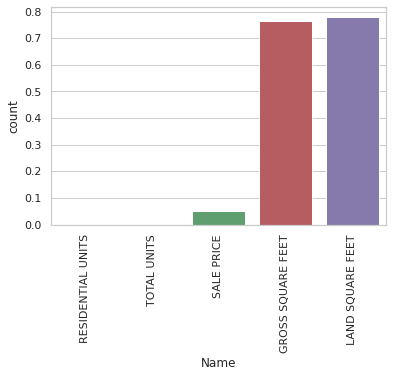

In [24]:
#plot the missing values
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Name', y='count',data=miss)
plt.xticks(rotation=90)
plt.savefig('missing_values.png')
sns

In [25]:
#There are many missing values in the columns :
# APARTMENT NUMBER
#LAND SQUARE FEET
#GROSS SQUARE FEET
#COMMERCIAL UNITS
#RESIDENTIAL UNITS
#SALE PRICE
#We can drop the rows with missing values or we can fill them up with their mean, median or any other relation.

#For time being, let's fill these up with mean values.
#Further, We will try to predict the value of SALE PRICE as test data.


In [26]:
# Fill these up with mean values.
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())
df['RESIDENTIAL UNITS']=df['RESIDENTIAL UNITS'].fillna(df['RESIDENTIAL UNITS'].mean())


In [27]:
#Dropping as it looks like an iterator 
del df['SALEDATE']

In [28]:
del df['APARTMENT NUMBER']
del df['Unnamed: 0']

In [29]:
# Splitting dataset 
test=df[df['SALE PRICE'].isna()]
data=df[~df['SALE PRICE'].isna()]

In [30]:
test = test.drop(columns='SALE PRICE')


In [31]:
# dropping Nan rows
test.dropna(subset=['RESIDENTIAL UNITS'], axis=0, how='any', inplace=True)
test.dropna(subset=['COMMERCIAL UNITS'], axis=0, how='any', inplace=True)
test.dropna(subset=['TOTAL UNITS'], axis=0, how='any', inplace=True)

In [32]:
# Print first rows of test
print(test.shape)
test.head()

(19539, 15)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
345059,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,3030.0,65.0,4455 PARK AVENUE,10457.0,1.0,0.0,1.0,187.582184,258.360908,1899.0,1.0,A1
345060,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,3030.0,67.0,4451 PARK AVENUE,10457.0,1.0,0.0,1.0,187.582184,258.360908,1899.0,1.0,A1
345061,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,3039.0,29.0,2327 WASHINGTON AVE,10458.0,1.0,0.0,1.0,187.582184,258.360908,1910.0,1.0,A9
345065,2.0,BATHGATE,02 TWO FAMILY DWELLINGS,3027.0,26.0,414 EAST 178 STREET,10457.0,2.0,0.0,2.0,187.582184,258.360908,1899.0,1.0,B2
345066,2.0,BATHGATE,02 TWO FAMILY DWELLINGS,3034.0,138.0,1937 WASHINGTON AVE,10457.0,2.0,0.0,2.0,187.582184,258.360908,1995.0,1.0,B1


In [33]:
#Printing first rows of our data
print(data.shape)
data.head(1)

(353639, 16)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1.0,FINANCIAL,14 RENTALS - 4-10 UNIT,7.0,38.0,60 PEARL STREET,10004.0,3.0,2.0,5.0,187.582184,258.360908,1900.0,2.0,S9,4027000.0


In [34]:
# Capture the necessary data
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

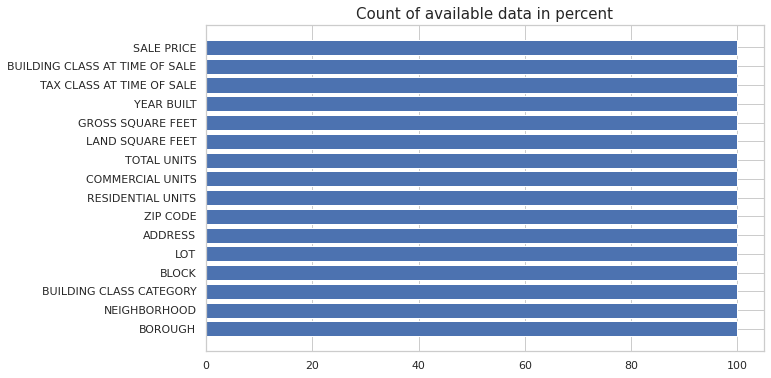

In [35]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.savefig('Count_of_available_data_in_percent.png')
plt.show()

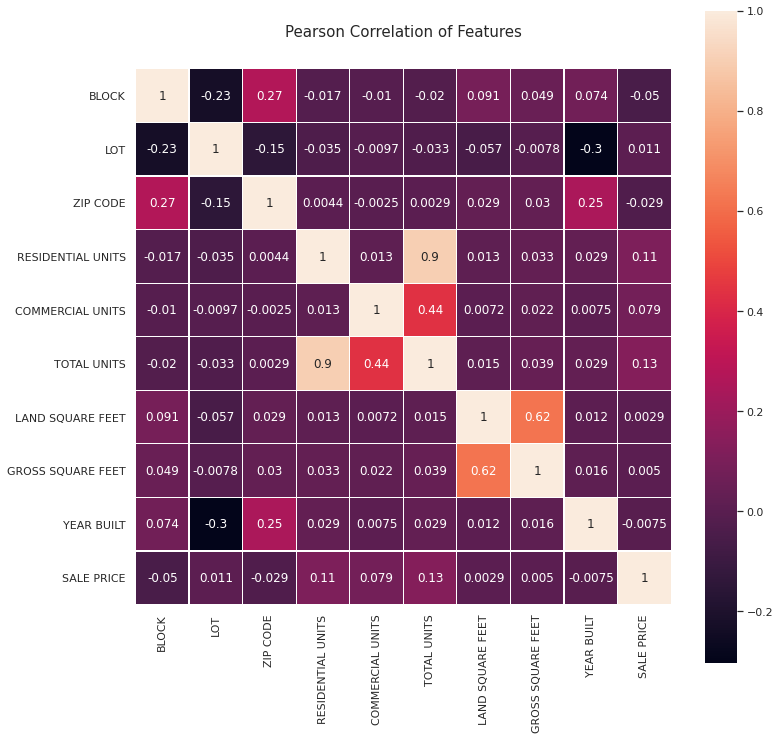

In [36]:
#Pearson correlation between the features
corr = data.corr()
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(corr)
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
corr['SALE PRICE'].sort_values(ascending=False)
plt.savefig('Correlation_of_features.png')


# Last row represents the correlation of different features with SALE PRICE

In [37]:
#numeric correlation
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
TOTAL UNITS          0.134339
RESIDENTIAL UNITS    0.112157
COMMERCIAL UNITS     0.079008
LOT                  0.011010
GROSS SQUARE FEET    0.005014
LAND SQUARE FEET     0.002906
YEAR BUILT          -0.007473
ZIP CODE            -0.028626
BLOCK               -0.049868
Name: SALE PRICE, dtype: float64

In [38]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,353639.000000,353639.000000,353639.000000,353639.000000,353639.000000,353639.000000,353639.000000,353639.000000,353639.000000,3.536390e+05
mean,4319.667627,366.593676,10767.899595,1.926849,0.216110,2.179655,192.766157,265.201233,1783.895328,1.144289e+06
std,3620.172466,661.896302,1115.012967,14.094472,6.696062,15.716844,627.111186,715.115335,544.993274,1.217997e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1333.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,187.582184,258.360908,1920.000000,0.000000e+00
50%,3379.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,187.582184,258.360908,1939.000000,3.960000e+05
75%,6410.000000,408.000000,11357.000000,2.000000,0.000000,2.000000,187.582184,258.360908,1965.000000,8.150000e+05
max,16350.000000,9139.000000,11697.000000,2229.000000,2261.000000,2261.000000,147343.000000,233210.000000,2020.000000,2.397502e+09


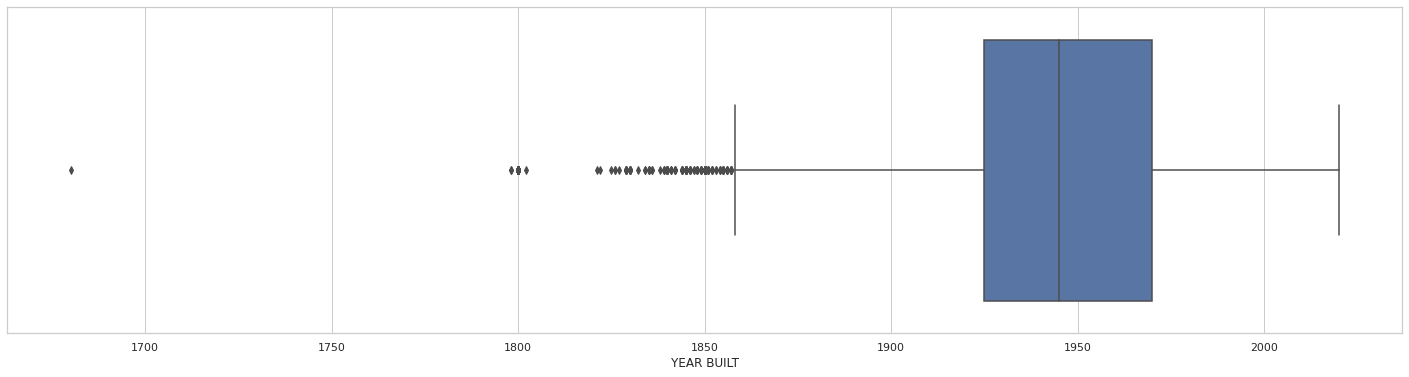

In [40]:
# YEAR BUILT has some too low values. Let's get rid of all observations with a year built before first European contact (1524).

plt.figure(figsize=(25,6))
data1 = data[data['YEAR BUILT'] > 1524]
sns.boxplot(data1['YEAR BUILT'])
plt.savefig('Year_Built_Boxplot.png')

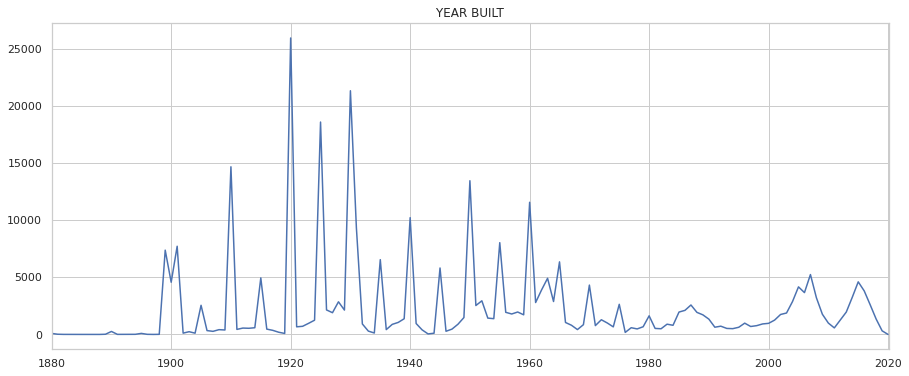

In [41]:
plt.figure(figsize=(15,6))

data1 = data[data['YEAR BUILT'] > 1524]
data1['YEAR BUILT'].value_counts().sort_index().plot.line()

plt.title(r' YEAR BUILT ')
plt.xlim(1880,2020.10)
plt.savefig('Year_Built_count.png')


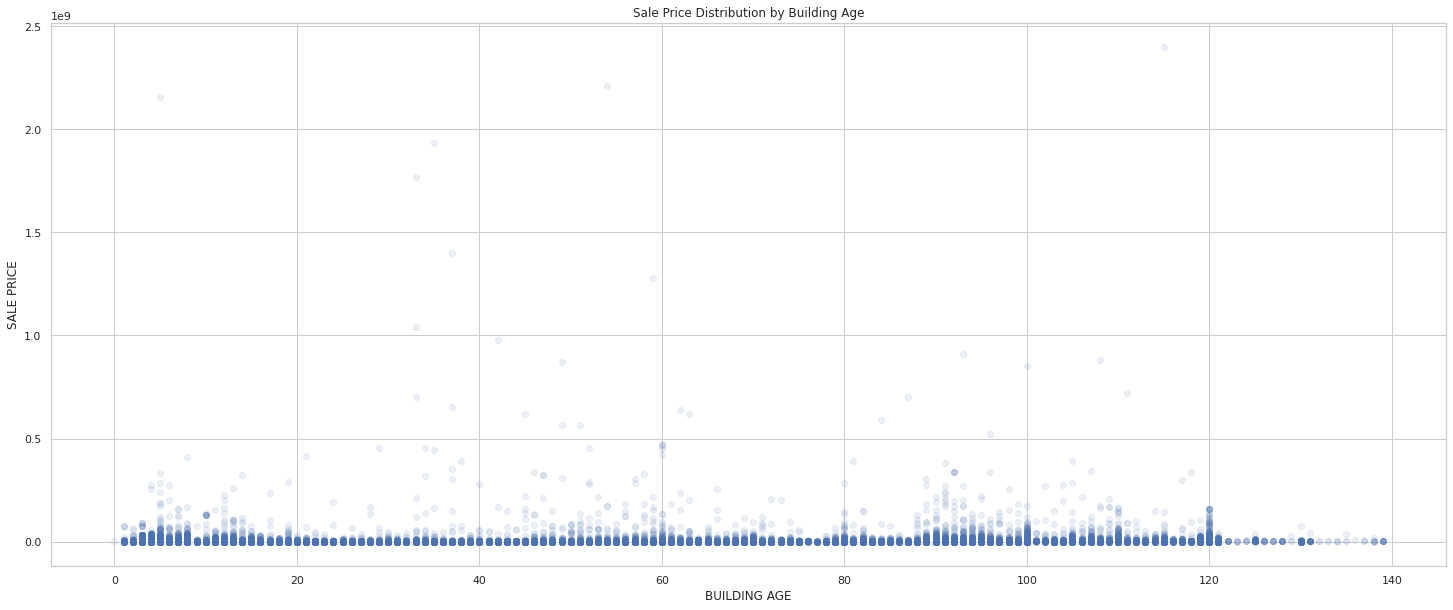

In [42]:
data1 = data[data['YEAR BUILT'] > 1880]
data2 = data1[data1['SALE PRICE'] > 0]
data2['BUILDING AGE'] = 2020 - data2['YEAR BUILT']
plt.figure(figsize=(25,10))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=data2, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.savefig('Price_Dist_by_Building_Age_from_1880.png')
plt.show()

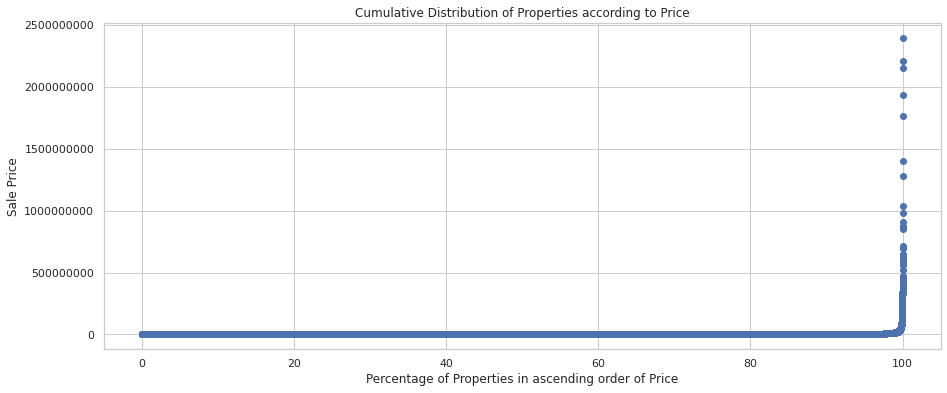

In [43]:
#Set the size of the plot
plt.figure(figsize=(15,6))

data1 = data[data['SALE PRICE'] > 0]

#Get the data and format it
x = data1[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Cumulative_Dist_of_Properties.png')
plt.show()

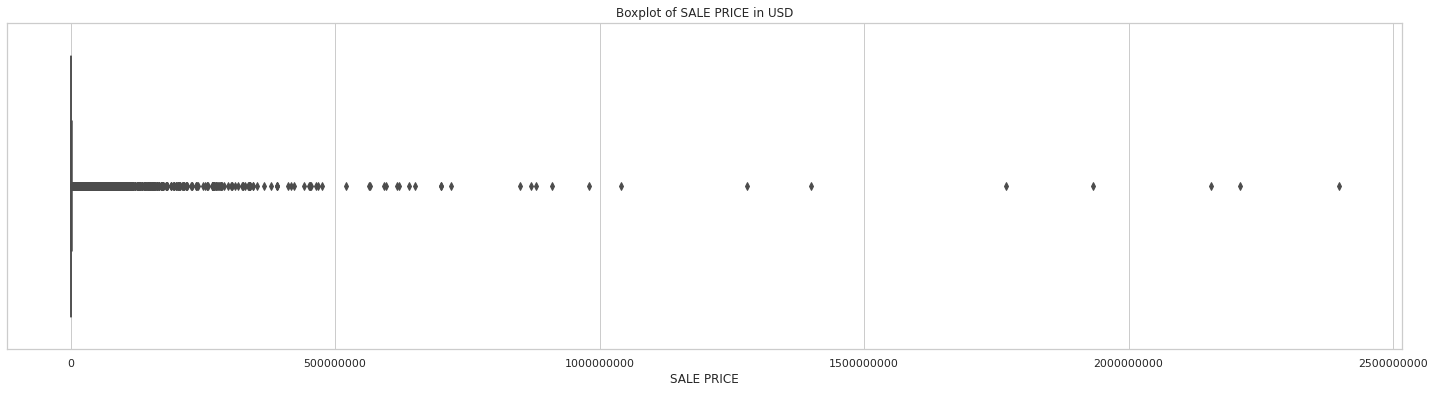

In [44]:
plt.figure(figsize=(25,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.savefig('Boxplot_of_Sale_Price.png')
plt.show()

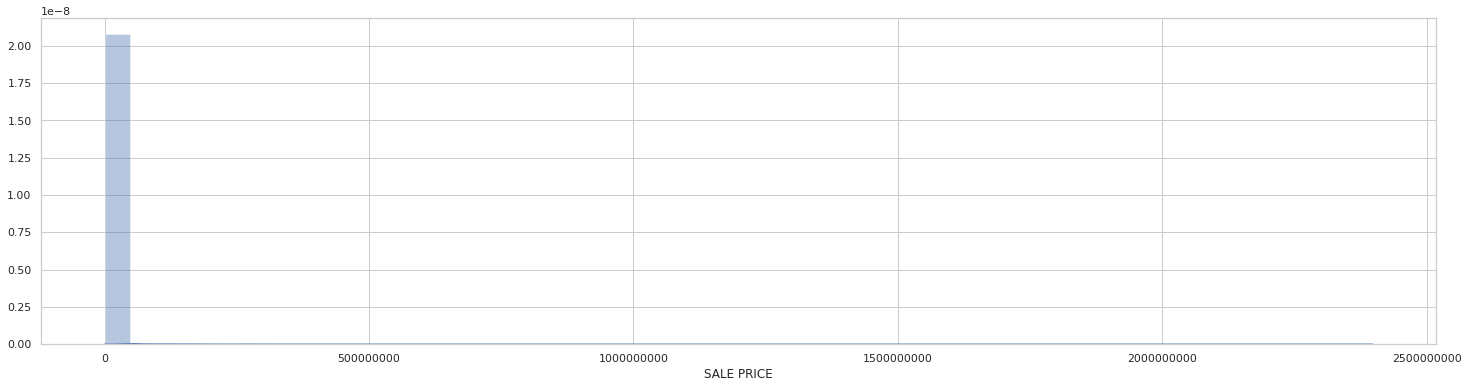

In [45]:
plt.figure(figsize=(25,6))
sns.distplot(data['SALE PRICE'])
plt.ticklabel_format(style='plain', axis='x')


In [46]:
# Let's check again

In [46]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

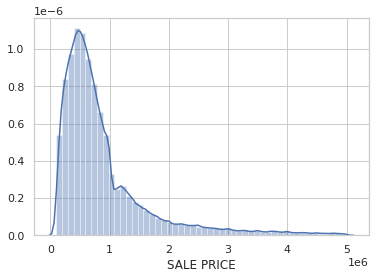

In [47]:
sns.distplot(data['SALE PRICE'])
plt.savefig('Sale_Price_outside_of_caps.png')

In [48]:
#skewness of SalePrice
data['SALE PRICE'].skew()

2.3471918591939964

0.18892447042712512


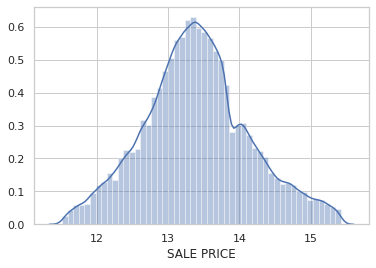

In [49]:
# SALE PRICE is highly right skewed. So, we will log transform it so that it give better results.

sales=np.log(data['SALE PRICE'])
print(sales.skew())
plt.savefig('Skewed_Sale_Price.png')
sns.distplot(sales)


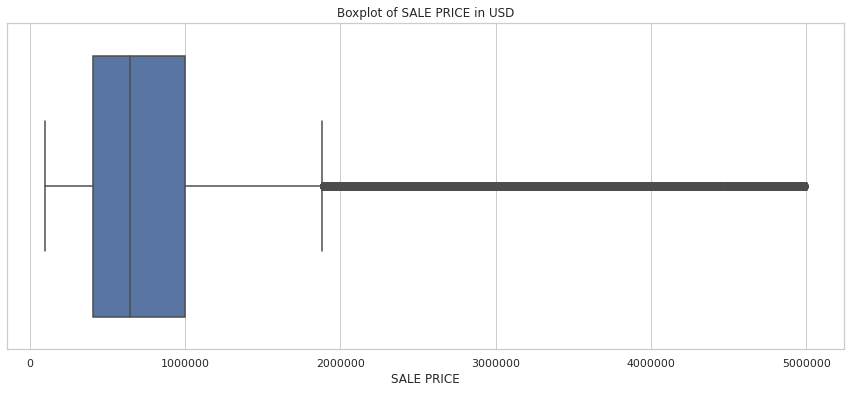

In [50]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.savefig('Boxplot_of_Sale_Price_limited.png')
plt.show()

In [52]:
# YEAR BUILT isn't quite the variable we are looking for. What is more interesting is the BUILDING AGE. 
# Both contain similar information, the second is however a bit more practical. So, let's create it.

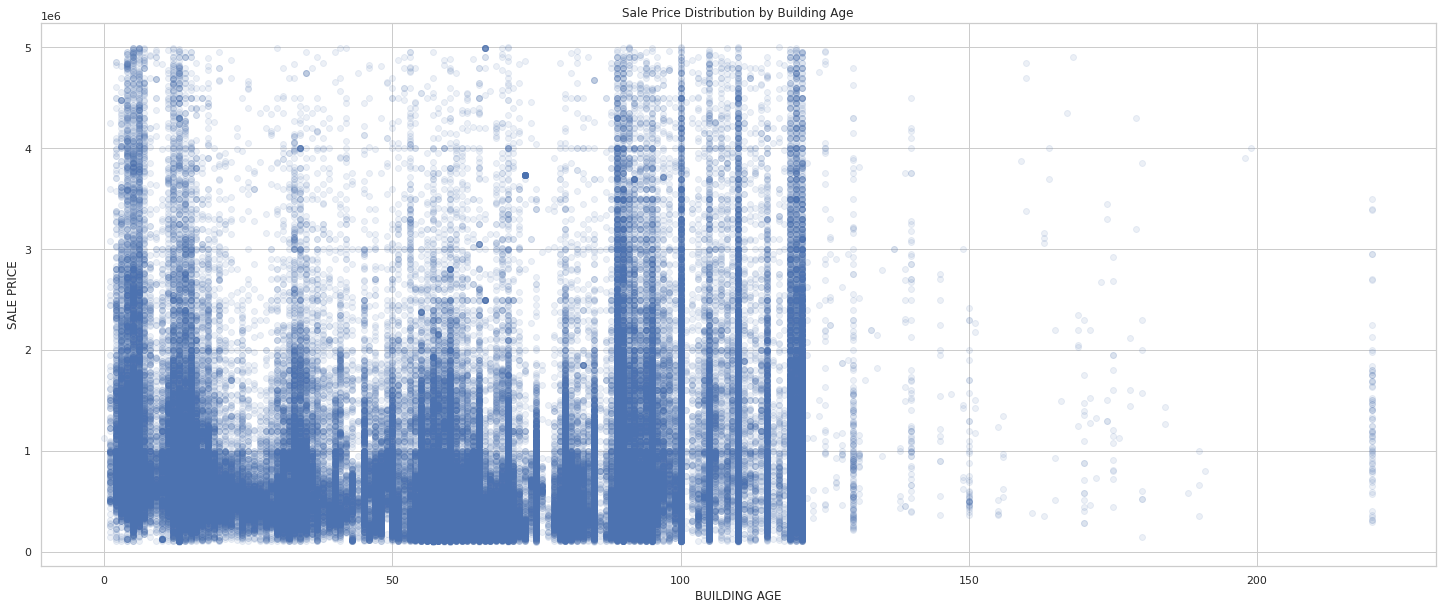

In [52]:
data = data[(data['SALE PRICE'] > 0) & (data['SALE PRICE'] < 5000000)]
data1 = data[data['YEAR BUILT'] > 1524]
data1['BUILDING AGE'] = 2020 - data1['YEAR BUILT']
plt.figure(figsize=(25,10))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=data1, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.savefig('Sale_Price_Distribution_by_Building_Age.png')
plt.show()

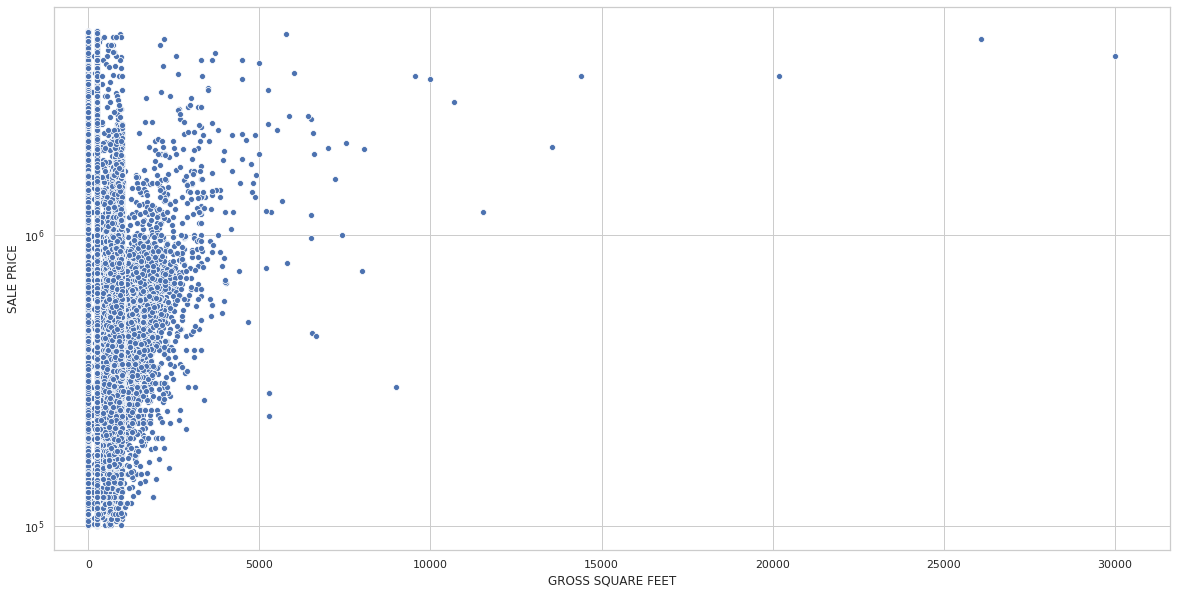

In [53]:
# Visualize Numerical data
# SQUARE FEET

plt.rcParams['figure.figsize'] = (20, 10)

fig, ax = plt.subplots()
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data)
ax.set_xlim([-10**3, 10**4.5])
# ax.set_ylim([.5, 10**9])
ax.set_yscale("log")
plt.savefig('GROSS_SQUARE_FEET_vs_Sale.png')
plt.show()

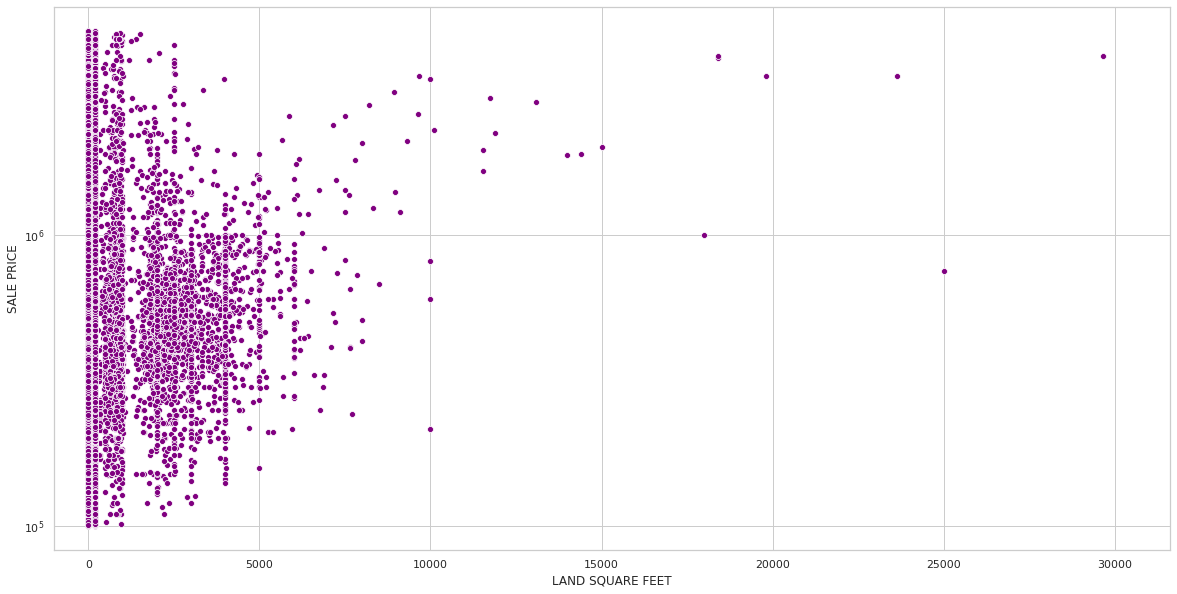

In [54]:
plt.rcParams['figure.figsize'] = (20, 10)

fig, ax = plt.subplots()
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, color="purple")
ax.set_xlim([-10**3, 10**4.5])
# ax.set_ylim([.5, 10**9])
ax.set_yscale("log")
plt.savefig('LAND_SQUARE_FEET_vs_Sale.png')
plt.show()

<Figure size 1800x432 with 0 Axes>

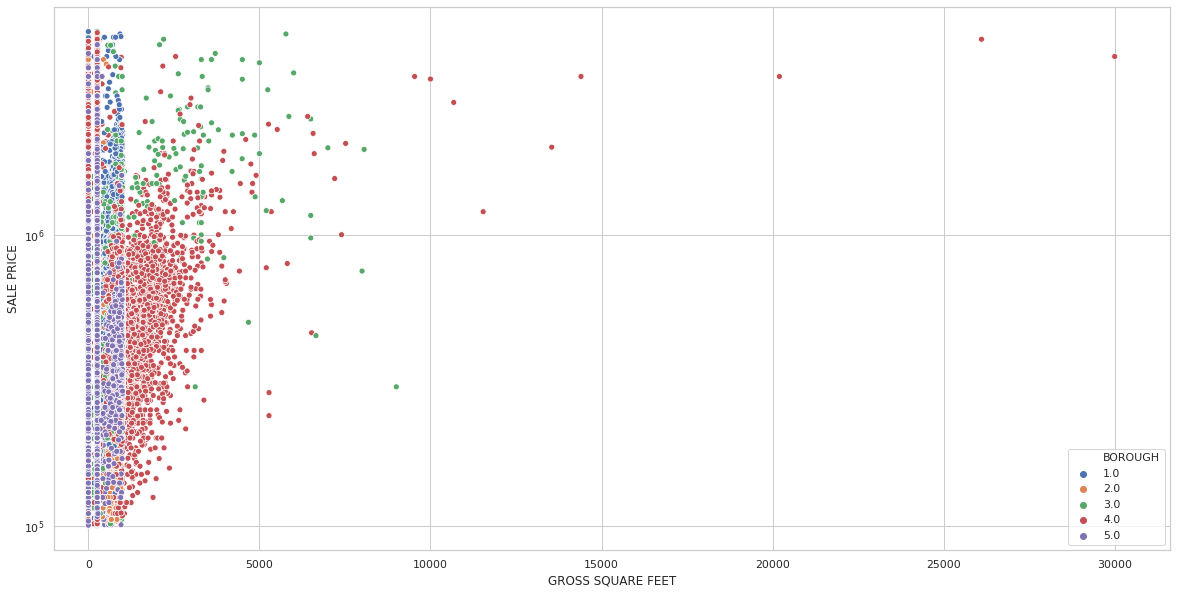

In [55]:
plt.figure(figsize=(25,6))
fig, ax = plt.subplots()
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, hue='BOROUGH')
ax.set_xlim([-10**3, 10**4.5])
# ax.set_ylim([10**4, 10**7.5])
ax.set_yscale("log")
plt.savefig('GROSS_SQUARE_FEET_vs_Sale_per_Borough.png')
plt.show()

In [56]:
# data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[(data['GROSS SQUARE FEET'] > 0) & (data['GROSS SQUARE FEET'] < 10000)]
# data = data[data['LAND SQUARE FEET'] < 10000]
data = data[(data['LAND SQUARE FEET'] > 0) & (data['LAND SQUARE FEET'] < 10000)]



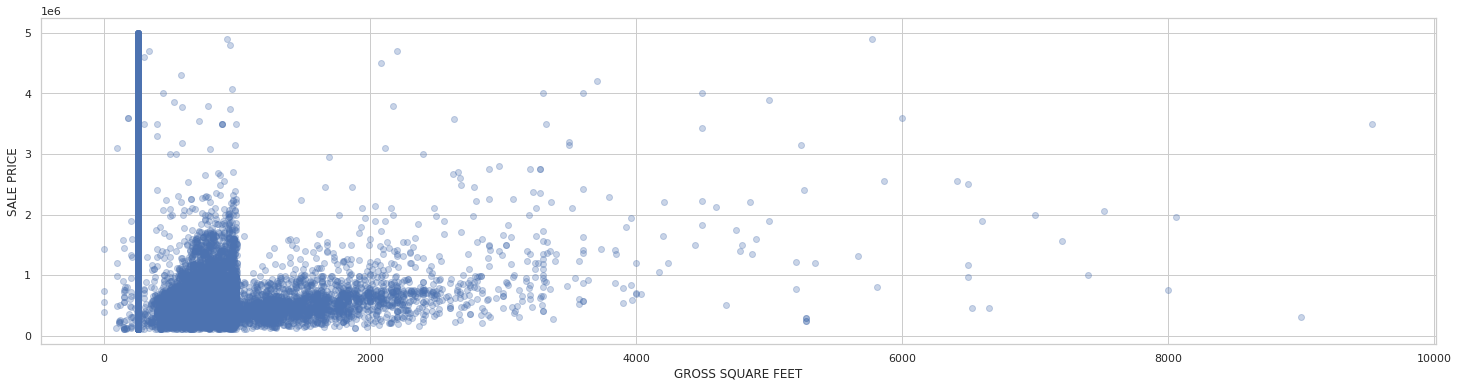

In [58]:
# Plot data and a linear regression model fit.
plt.figure(figsize=(25,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.savefig('GROSS_SQUARE_FEET_vs_Sale_reg.png')

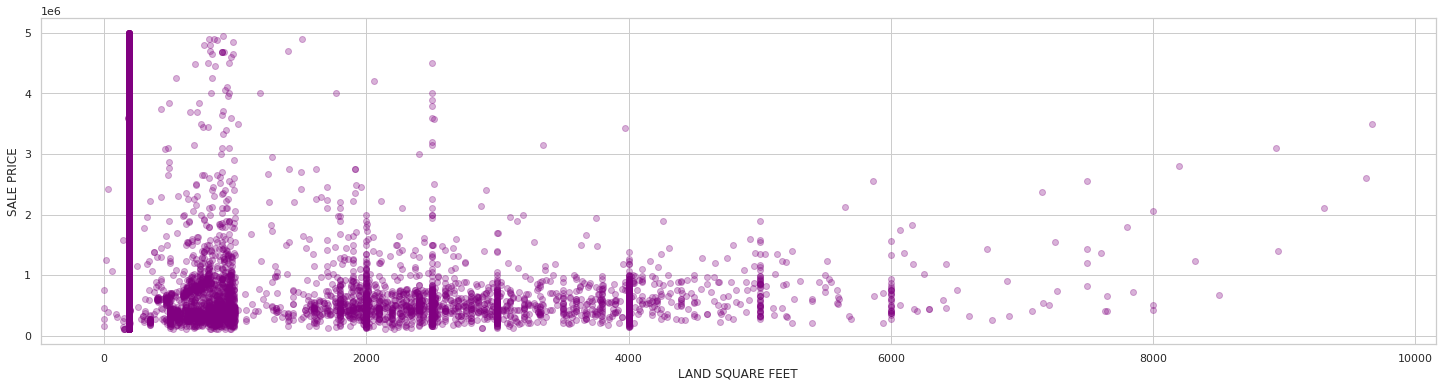

In [59]:
plt.figure(figsize=(25,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, color= "purple", scatter_kws={'alpha':0.3})
plt.savefig('LAND_SQUARE_FEET_vs_Sale_reg.png')

In [60]:
data[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1.0,79228
2,2.0,38380
0,0.0,33417
3,3.0,11136
4,4.0,2755
...,...,...
83,121.0,1
84,122.0,1
87,130.0,1
89,134.0,1


In [61]:
# Removing rows with TOTAL UNITS == 0 and smaller than 50 units

data1 = data[(data['TOTAL UNITS'] > 0) & (data['TOTAL UNITS'] < 50)] 

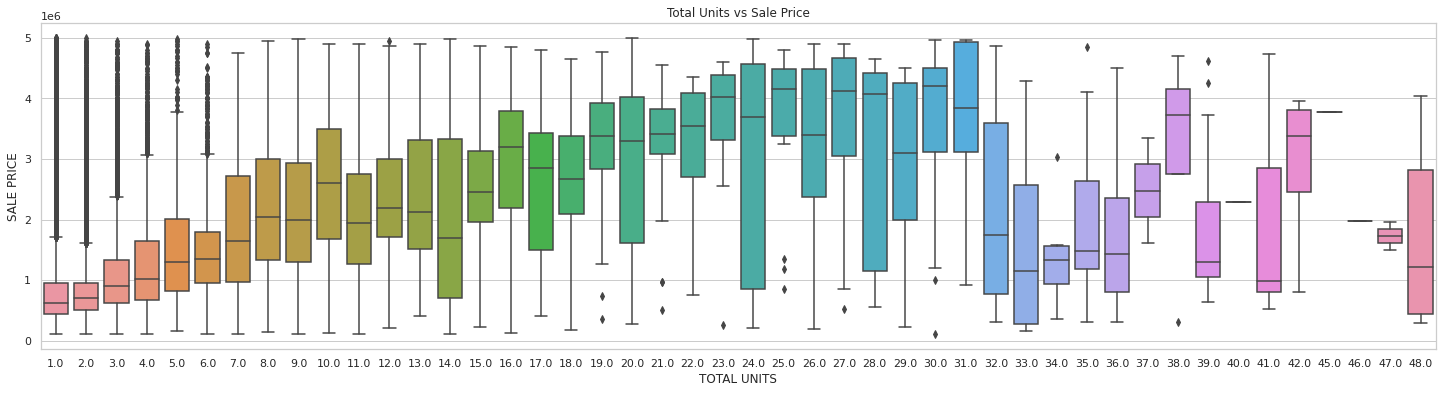

In [62]:
plt.figure(figsize=(25,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data1)
plt.title('Total Units vs Sale Price')
plt.savefig('Total_Unit_vs_Sale1.png')
plt.show()

In [63]:
# Removing rows with TOTAL UNITS smaller than 49 and greater than 100 units

data2 = data[(data['TOTAL UNITS'] > 49) & (data['TOTAL UNITS'] < 100)] 


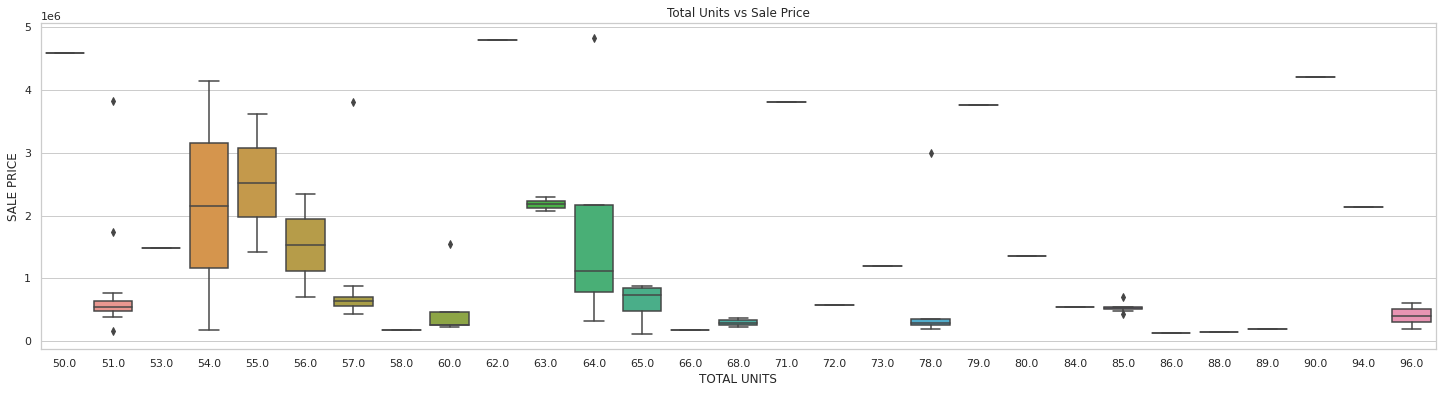

In [64]:
plt.figure(figsize=(25,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data2)
plt.title('Total Units vs Sale Price')
plt.savefig('Total_Unit_vs_Sale2')
plt.show()

In [65]:
# Excluding COMMERCIAL UNITS = 0
data3 = data[(data['COMMERCIAL UNITS'] > 0)] 


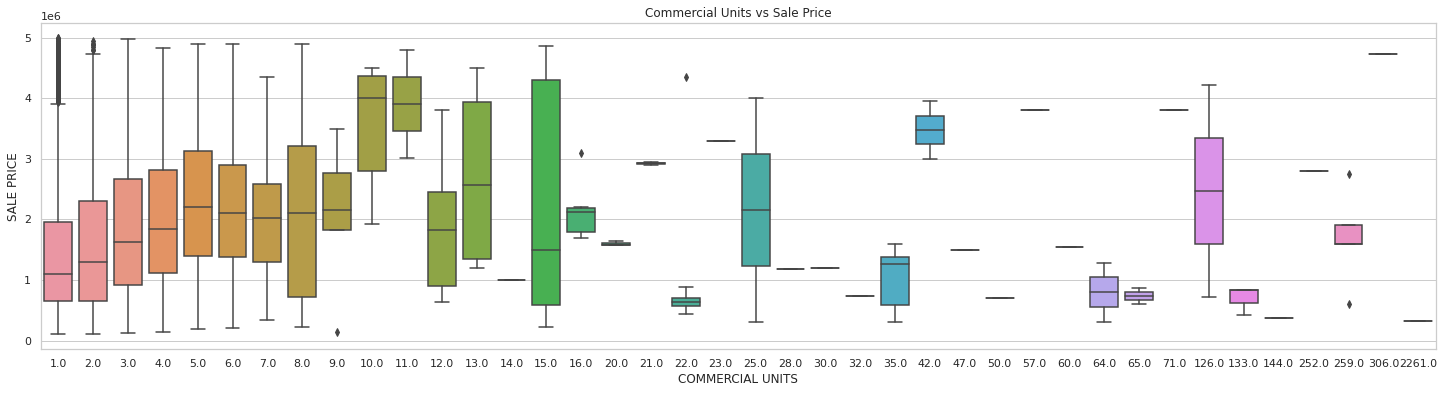

In [66]:
plt.figure(figsize=(25,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data3)
plt.title('Commercial Units vs Sale Price')
plt.savefig('Commercial_Unit_vs_Sale.png')
plt.show()

In [67]:
data[["RESIDENTIAL UNITS", "SALE PRICE"]].groupby(['RESIDENTIAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,RESIDENTIAL UNITS,SALE PRICE
1,1.0,77385
2,2.0,38684
0,0.0,37650
3,3.0,9568
4,4.0,2474
...,...,...
81,130.0,1
82,134.0,1
83,136.0,1
84,142.0,1


In [68]:
# Removing rows with RESIDENTIAL UNITS == 0 and smaller than 50 units

data1 = data[(data['RESIDENTIAL UNITS'] > 0) & (data['RESIDENTIAL UNITS'] < 50)] 

In [69]:
# Removing rows with Nan values
data1.dropna(subset=['RESIDENTIAL UNITS'], axis=0, how='any', inplace=True)


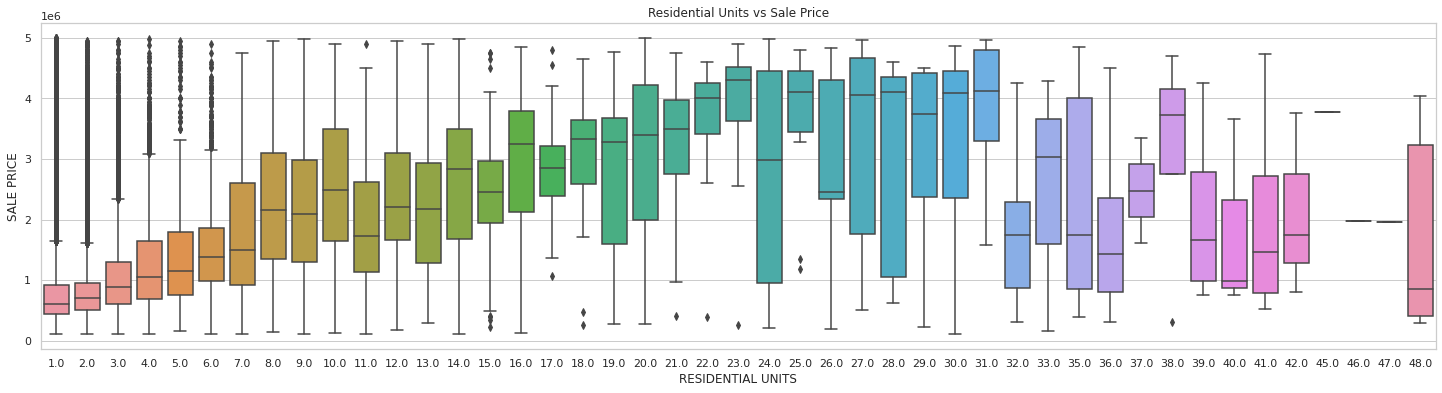

In [70]:
plt.figure(figsize=(25,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data1)
plt.title('Residential Units vs Sale Price')
plt.savefig('Residential_Unit_vs_Sale1')
plt.show()

In [71]:
# Removing rows with RESIDENTIAL UNITS greater than 49 

data2 = data[(data['RESIDENTIAL UNITS'] > 49)]

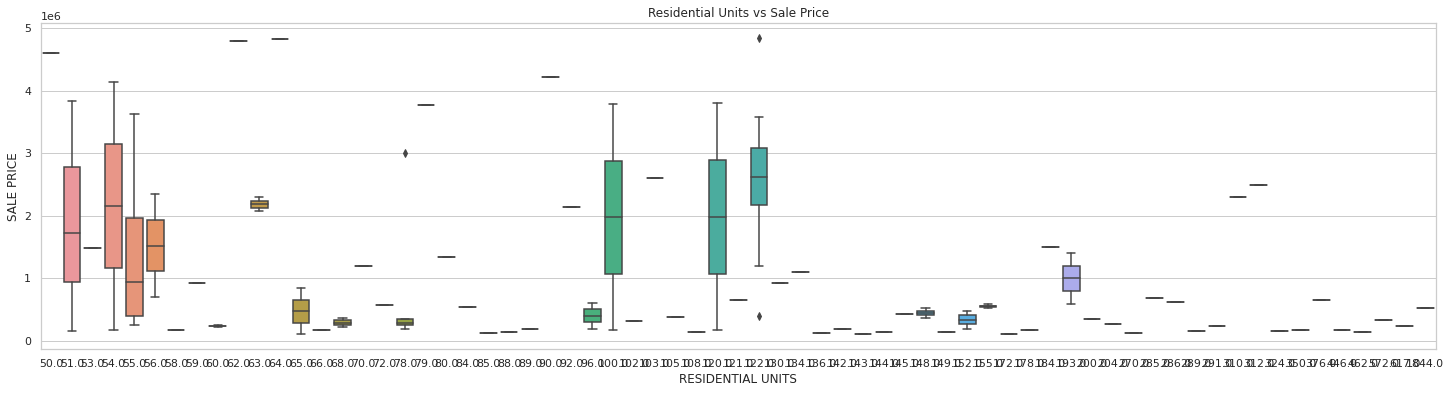

In [72]:
plt.figure(figsize=(25,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data2)
plt.title('Residential Units vs Sale Price')
plt.savefig('Residential_Unit_vs_Sale2')
plt.show()

In [73]:
data2.dropna(subset=['RESIDENTIAL UNITS'], axis=0, how='any', inplace=True)


In [74]:
# Visualize categorical data
cat_data=data.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,169461.0,169461,169461,169461,169461.0,169461
unique,5.0,257,87,139593,4.0,157
top,4.0,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,131-03 40TH ROAD,1.0,D4
freq,57255.0,5516,38034,235,102269.0,22040


In [75]:
#  TAX CLASS AT TIME OF SALE
data['TAX CLASS AT TIME OF SALE'].unique()

[2.0, 4.0, 1.0, 3.0]
Categories (4, float64): [2.0, 4.0, 1.0, 3.0]

In [76]:
pivot=data.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1.0,618000.0
2.0,716674.0
3.0,1109946.5
4.0,1186143.5


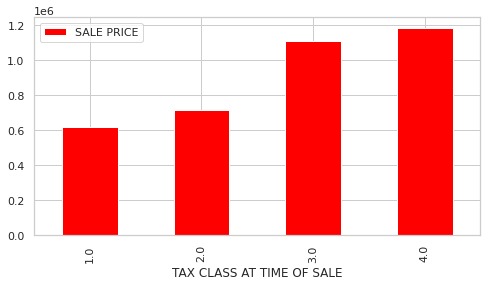

In [77]:
pivot.plot(kind='bar', color='red',figsize=(8,4))
plt.savefig('Tax_class')

In [78]:
pivot=data.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1.0,618000.0
2.0,716674.0
3.0,1109946.5
4.0,1186143.5


In [79]:
# BOROUGH
data['BOROUGH'].unique()

[1.0, 2.0, 3.0, 4.0, 5.0]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

In [80]:
pivot=data.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
BOROUGH,
1.0,1035500.0
2.0,480000.0
3.0,815000.0
4.0,590000.0
5.0,500000.0


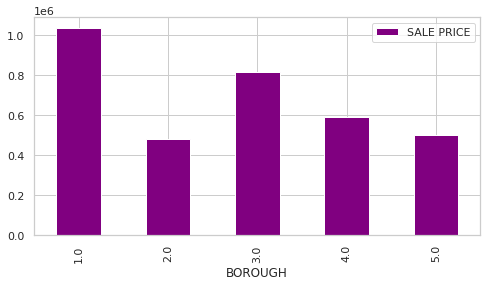

In [81]:
pivot.plot(kind='bar', color='purple',figsize=(8,4))

plt.savefig('Borough_vs_Sale')

# It means max sale price is of BOROUGH==1 which is Manhattan.

In [82]:
# BUILDING CLASS CATEGORY
print(data['BUILDING CLASS CATEGORY'].nunique())

pivot=data.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

87


,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,489000.0
01 ONE FAMILY DWELLINGS,559081.5
02 TWO FAMILY DWELLINGS,630000.0
02 TWO FAMILY DWELLINGS,720000.0
03 THREE FAMILY DWELLINGS,772500.0
...,...
47 CONDO NON-BUSINESS STORAGE,175000.0
47 CONDO NON-BUSINESS STORAGE,267744.5
48 CONDO TERRACES/GARDENS/CABANAS,1300000.0


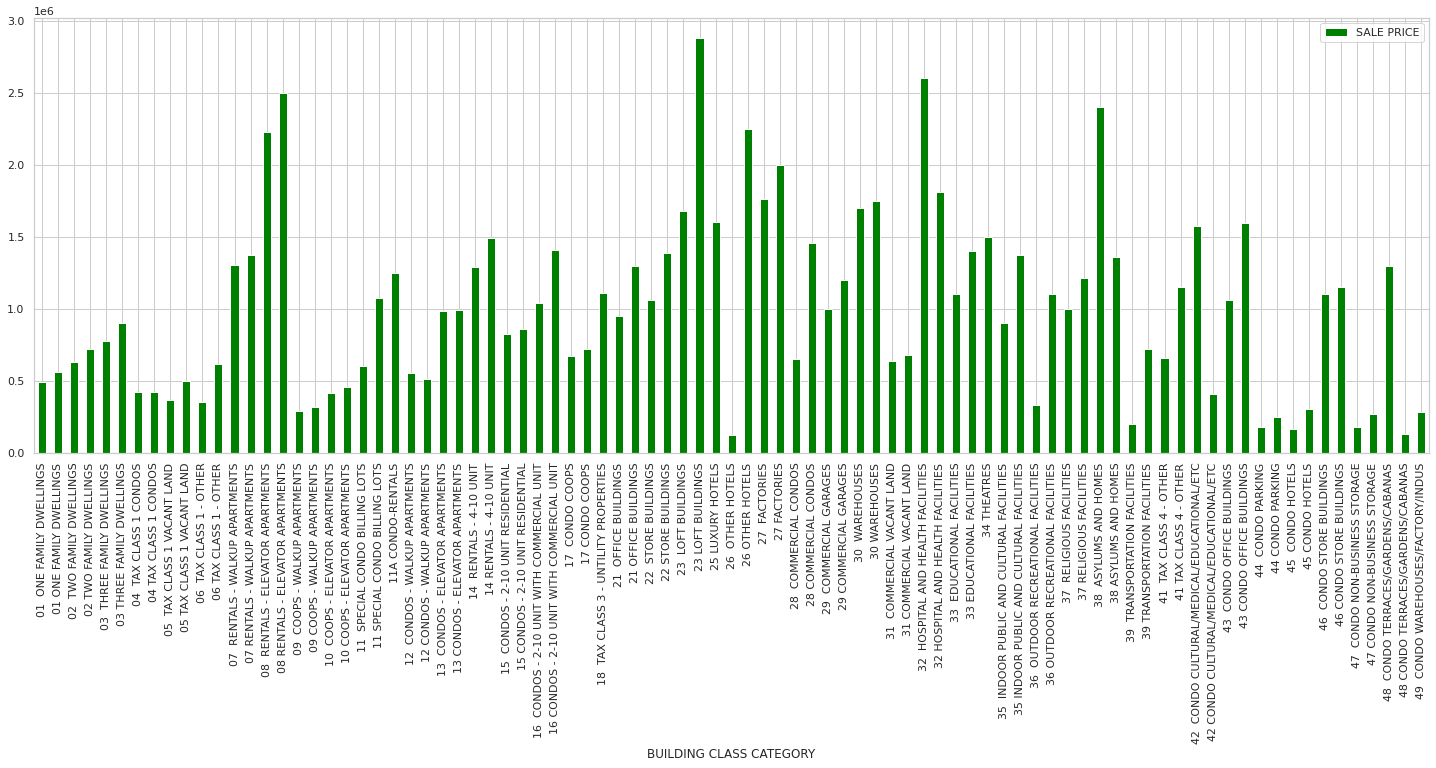

In [83]:
pivot.plot(kind='bar', color='Green', figsize=(25,8))
plt.savefig('Buildong_Class_vs_Sale')


# 3. Data Pre Processing

In [84]:
data.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1.0,FINANCIAL,14 RENTALS - 4-10 UNIT,7.0,38.0,60 PEARL STREET,10004.0,3.0,2.0,5.0,187.582184,258.360908,1900.0,2.0,S9,4027000.0


In [85]:
del data['ADDRESS']

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169461 entries, 0 to 345058
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   BOROUGH                         169461 non-null  category
 1   NEIGHBORHOOD                    169461 non-null  object  
 2   BUILDING CLASS CATEGORY         169461 non-null  object  
 3   BLOCK                           169461 non-null  float64 
 4   LOT                             169461 non-null  float64 
 5   ZIP CODE                        169461 non-null  float64 
 6   RESIDENTIAL UNITS               169461 non-null  float64 
 7   COMMERCIAL UNITS                169461 non-null  float64 
 8   TOTAL UNITS                     169461 non-null  float64 
 9   LAND SQUARE FEET                169461 non-null  float64 
 10  GROSS SQUARE FEET               169461 non-null  float64 
 11  YEAR BUILT                      169461 non-null  float64 
 12  TA

In [87]:
# Normalising and Transforming Numerical columns

numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [88]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [89]:
#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [90]:
scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       data[col] = scaled[:,i]

In [91]:
data.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1.0,FINANCIAL,14 RENTALS - 4-10 UNIT,-5.119068,-0.281926,-0.774302,1.336814,4.956891,2.040703,-0.148946,-0.248295,0.138533,2.0,S9,2.508588
14,2.0,PELHAM PARKWAY SOUTH,22 STORE BUILDINGS,0.315897,-1.940676,-0.335811,-1.442725,3.055305,-0.117270,-0.148946,-0.248295,0.209191,4.0,K1,-0.764943
15,2.0,PELHAM PARKWAY SOUTH,22 STORE BUILDINGS,0.315897,-1.940676,-0.335811,-1.442725,3.055305,-0.117270,-0.148946,-0.248295,0.209191,4.0,K1,-0.764943
16,2.0,PELHAM PARKWAY SOUTH,22 STORE BUILDINGS,0.315897,-1.940676,-0.335811,-1.442725,3.055305,-0.117270,-0.148946,-0.248295,0.209191,4.0,K1,1.721113
17,2.0,PELHAM PARKWAY SOUTH,22 STORE BUILDINGS,0.315897,-1.940676,-0.335811,-1.442725,3.055305,-0.117270,-0.148946,-0.248295,0.209191,4.0,K1,-0.764943


In [107]:
del data['NEIGHBORHOOD']
del data['BUILDING CLASS AT TIME OF SALE']



In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169461 entries, 0 to 345058
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   BOROUGH                    169461 non-null  category
 1   BUILDING CLASS CATEGORY    169461 non-null  object  
 2   BLOCK                      169461 non-null  float64 
 3   LOT                        169461 non-null  float64 
 4   ZIP CODE                   169461 non-null  float64 
 5   RESIDENTIAL UNITS          169461 non-null  float64 
 6   COMMERCIAL UNITS           169461 non-null  float64 
 7   TOTAL UNITS                169461 non-null  float64 
 8   LAND SQUARE FEET           169461 non-null  float64 
 9   GROSS SQUARE FEET          169461 non-null  float64 
 10  YEAR BUILT                 169461 non-null  float64 
 11  TAX CLASS AT TIME OF SALE  169461 non-null  category
 12  SALE PRICE                 169461 non-null  float64 
dtypes: category(2)

In [110]:
# One hot encoding categorical columns

In [111]:
#Select the variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT TIME OF SALE']

In [112]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169461 entries, 0 to 345058
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count   Dtype
---  ------                                                               --------------   -----
 0   BOROUGH_1.0                                                          169461 non-null  uint8
 1   BOROUGH_2.0                                                          169461 non-null  uint8
 2   BOROUGH_3.0                                                          169461 non-null  uint8
 3   BOROUGH_4.0                                                          169461 non-null  uint8
 4   BOROUGH_5.0                                                          169461 non-null  uint8
 5   BUILDING CLASS CATEGORY_01  ONE FAMILY DWELLINGS                     169461 non-null  uint8
 6   BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                      169461 non-null  uint8
 7   BUILDING CL

In [113]:
data.dtypes

BOROUGH                      category
BUILDING CLASS CATEGORY        object
BLOCK                         float64
LOT                           float64
ZIP CODE                      float64
RESIDENTIAL UNITS             float64
COMMERCIAL UNITS              float64
TOTAL UNITS                   float64
LAND SQUARE FEET              float64
GROSS SQUARE FEET             float64
YEAR BUILT                    float64
TAX CLASS AT TIME OF SALE    category
SALE PRICE                    float64
dtype: object

In [114]:
# Replacing categorical columns with dummies
fdf = data.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [115]:
fdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 169461 entries, 0 to 345058
Columns: 106 entries, BLOCK to TAX CLASS AT TIME OF SALE_4.0
dtypes: float64(10), uint8(96)
memory usage: 29.7 MB


In [116]:
# Train/Test Split

In [117]:
Y_fdf = fdf['SALE PRICE']
X_fdf = fdf.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((169461, 105), (169461,))

In [118]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.3 , random_state =34)

In [119]:
# Training set
X_train.shape , Y_train.shape

((118622, 105), (118622,))

In [120]:
#Testing set
X_test.shape , Y_test.shape

((50839, 105), (50839,))

# 4. Modelling

In [122]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))


In [123]:
X_train.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BOROUGH_1.0,BOROUGH_2.0,BOROUGH_3.0,BOROUGH_4.0,BOROUGH_5.0,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,...,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS,TAX CLASS AT TIME OF SALE_1.0,TAX CLASS AT TIME OF SALE_2.0,TAX CLASS AT TIME OF SALE_3.0,TAX CLASS AT TIME OF SALE_4.0
238421,0.073568,1.532494,0.390859,-0.052955,-0.195478,-0.11727,-0.148946,2.194828,0.396876,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
213322,0.057541,-0.032136,-0.486123,-0.052955,-0.195478,-0.11727,-0.148946,-0.248295,0.335050,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
75340,0.922411,1.606297,0.404262,-0.052955,-0.195478,-0.

In [124]:
# 4.1 Linear Regression

results = []

In [126]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred_lin = linreg.predict(X_test)
Y_pred_lin.reshape(-1, 1)
rmse(Y_test,Y_pred_lin)
results.append({
    "Model": "LinearRegression",
    "rmse":rmse(Y_test,Y_pred_lin),
    "score":linreg.score(X_test,Y_test)
})

In [127]:
results

[{'Model': 'LinearRegression',
  'rmse': 40956416.93289011,
  'score': -1668211536528774.5}]

In [128]:
# 4.2. Lasso Regression
results = []

In [129]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
rmse(Y_test,Y_pred_lasso)
results.append({
    "Model": "LassoRegression",
    "rmse":rmse(Y_test,Y_pred_lin),
    "score":lasso_regr.score(X_test,Y_test)
})
results

[{'Model': 'LassoRegression',
  'rmse': 40956416.93289011,
  'score': 0.42506484310569814}]

In [130]:
# 4.3. Ridge Regression
results = []

In [131]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
rmse(Y_test,Y_pred_ridge)
results.append({
    "Model": "RidgeRegression",
    "rmse":rmse(Y_test,Y_pred_ridge),
    "score":ridge.score(X_test,Y_test)
})
results

[{'Model': 'RidgeRegression',
  'rmse': 0.750297049645264,
  'score': 0.44014741633656085}]

In [132]:
# 4.4. RandomForest Regressor
results = []

In [133]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
Y_pred_rf.reshape(-1, 1)

rmse(Y_test,Y_pred_rf)
results.append({
    "Model": "RandomForestRegression",
    "rmse":rmse(Y_test,Y_pred_rf),
    "score":rf_regr.score(X_test,Y_test)
})
results

[{'Model': 'RandomForestRegression',
  'rmse': 0.5804303191085846,
  'score': 0.6649517226668882}]

# 5. Conclusion

In [1]:
# We can see that Random Forest Regressor works best for this dataset with RSME score of 0.588

In [140]:
#prediction
a = pd.DataFrame(results)
a[a["rmse"]==a["rmse"].max()]
a[a["score"]==a["score"].max()]

,Model,rmse,score
0,RandomForestRegression,0.58043,0.664952


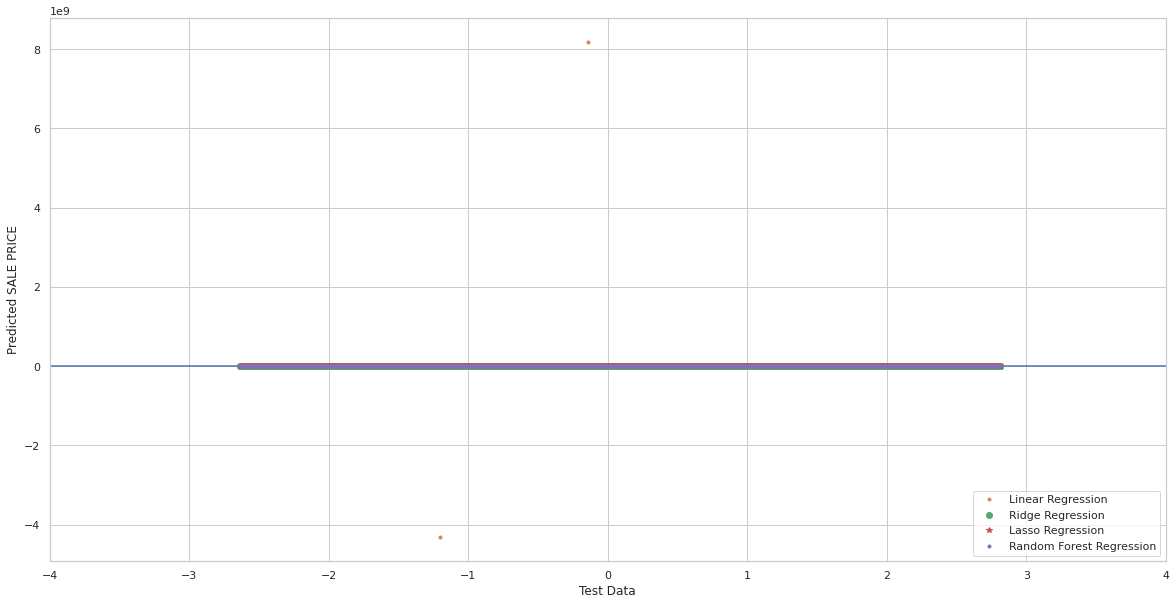

In [142]:
# plot a line, a perfit predict would all fall on this line
# plt.figure(figsize=(10,6))
# sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

import matplotlib.pyplot as plt

ind = np.linspace(-5,10,1000)
plt.xlabel('Test Data')
plt.ylabel('Predicted SALE PRICE') 
# plt.xlim(-100,10000000)
# plt.ylim(-100,10000000)

plt.plot(ind, ind,'-')
plt.plot(Y_test, Y_pred_lin, '.',label='Linear Regression')
plt.plot(Y_test, Y_pred_ridge, 'o',label='Ridge Regression')
plt.plot(Y_test, Y_pred_lasso, '*',label='Lasso Regression')
plt.plot(Y_test, Y_pred_rf, '.',label='Random Forest Regression')
plt.legend(loc='lower right')
plt.xlim(-4,4)

plt.show()

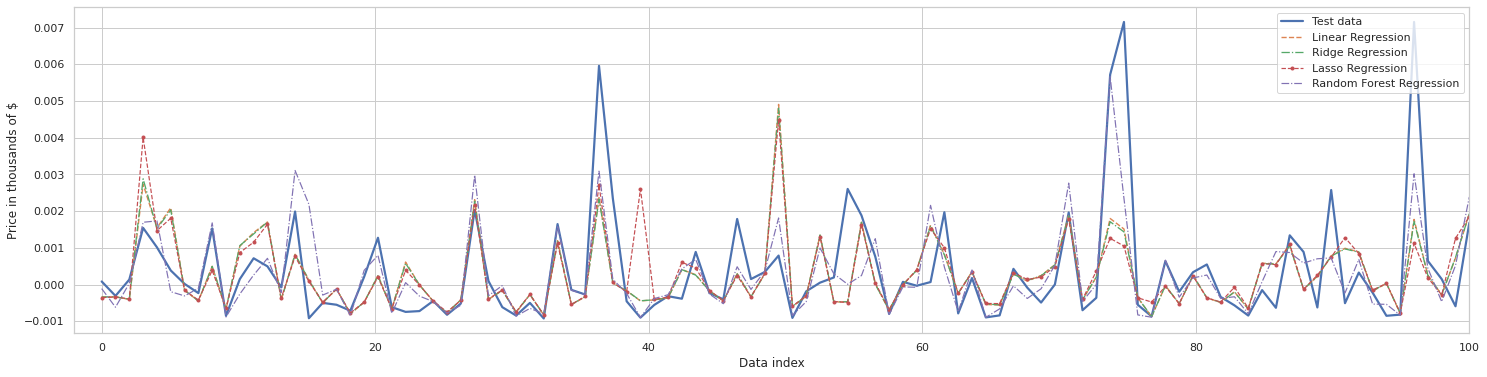

In [143]:
import matplotlib.pyplot as plt
import random
#select random data to show
i=random.randint(1,len(Y_test)-101)
ind = np.linspace(0,100,100)

plt.figure(figsize=(25,6))


plt.xlabel('Data index')
plt.ylabel('Price in thousands of $') 

plt.plot(ind, np.expm1(Y_test[i:i+100])/1000,'-', linewidth=2.2,label='Test data' )
plt.plot(ind, np.expm1(Y_pred_lin[i:i+100])/1000, '--',linewidth=1.4,label='Linear Regression')
plt.plot(ind, np.expm1(Y_pred_ridge[i:i+100])/1000, '-.',linewidth=1.3,label='Ridge Regression')
plt.plot(ind, np.expm1(Y_pred_lasso[i:i+100])/1000, '--.',linewidth=1.2,label='Lasso Regression')
plt.plot(ind, np.expm1(Y_pred_rf[i:i+100])/1000, '-.',linewidth=1.2,label='Random Forest Regression')
plt.legend(loc='upper right')
plt.xlim(-2,100)
plt.savefig('Test_models')
plt.show()

In [144]:
importance = pd.DataFrame(list(zip(X_train.columns, np.transpose(rf_regr.feature_importances_))) \
            ).sort_values(1, ascending=False)
importance

,0,1
0,BLOCK,3.103150e-01
5,TOTAL UNITS,1.339418e-01
1,LOT,1.302870e-01
2,ZIP CODE,1.122811e-01
8,YEAR BUILT,9.503259e-02
...,...,...
98,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GAR...,9.495013e-07
56,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,9.481337e-07
73,BUILDING CLASS CATEGORY_34 THEATRES,7.657752e-07
34,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILL...,0.000000e+00


<Figure size 1080x432 with 0 Axes>

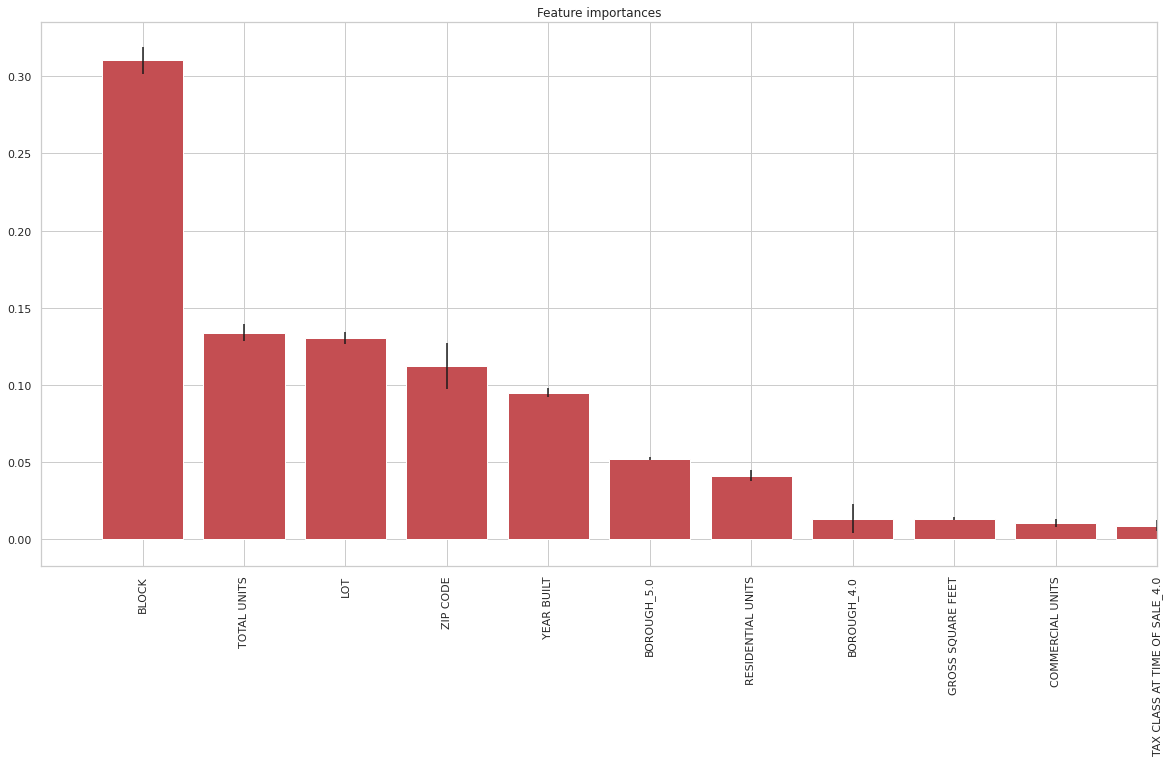

In [145]:
importances = rf_regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_regr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest

plt.figure(figsize=(15,6))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])
plt.savefig('Feature_importance_rf')
plt.show()

# Random Forest Regression managed to get a rmse of 0.58 and score of 0.66 which is certainly not great but maybe not bad given the amount of cleaned data available. 
# BLOCK, LOT, ZIP CODE, SQUARE FEET, BUILDING AGE, and BOROUGH were the most important features determining the SALE PRICE.